In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [24]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [25]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Check NULL value

In [26]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.var()

age         1.974014e+02
bmi         3.719027e+01
children    1.453213e+00
expenses    1.466524e+08
dtype: float64

In [27]:
covariance = df['age'].cov(df['expenses'])
print("Sample covariance:", covariance)


Sample covariance: 50874.80213261625


 Calculate sample covariance of age and Expenses

In [28]:
correlation = df['age'].corr(df['expenses'])
print("Sample correlation (Pearson):", correlation)


Sample correlation (Pearson): 0.2990081922850827


 Calculate sample correlation of age and Expenses

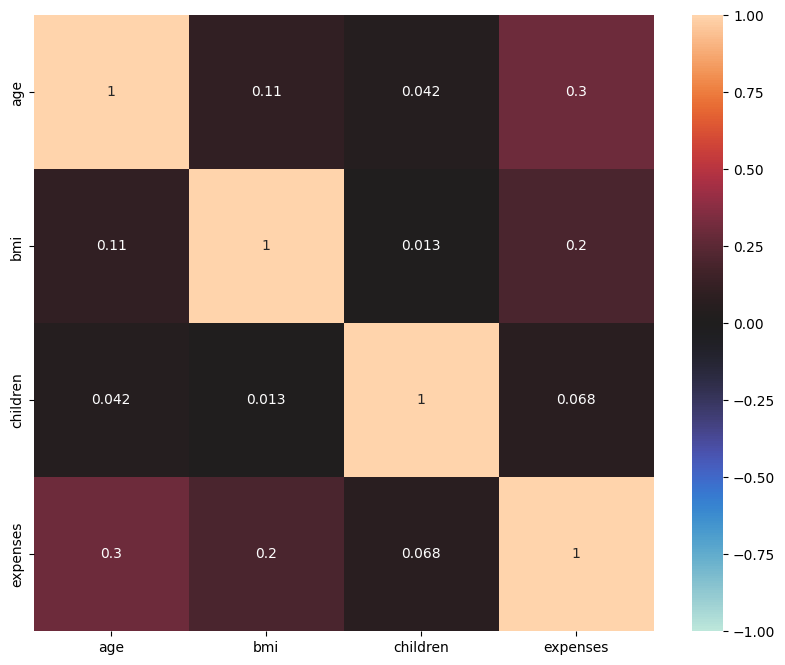

In [29]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

corr = df.select_dtypes(include='number').corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)


Correlation Heatmap

In [30]:
# Ensure that the cell defining 'df' is executed before running this cell.

# Bước 1: Xác định cột phân loại và số
cat_col = ['sex', 'smoker', 'region']  # Không có 'gender', đúng là 'sex'
num_col = [col for col in df.columns if col not in cat_col]

# Bước 2: One-hot encode toàn bộ các cột phân loại (giữ đủ tất cả giá trị)
one_hot = pd.get_dummies(df[cat_col])
one_hot = one_hot.astype(int)

# Bước 3: Ghép lại dataframe hoàn chỉnh
df_encoded = pd.concat([df[num_col], one_hot], axis=1)

# Bước 4: Xem kết quả
df_encoded.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


One-hot encoding

In [31]:
# Giả sử df_encoded là bảng đã encode sẵn (chỉ chứa số)
features = df_encoded.columns.drop('expenses')  # Giữ expenses lại để phân loại
X = df_encoded[features]
y = df_encoded['expenses']  # Dùng để vẽ màu nếu muốn

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Dữ liệu đã được chuẩn hóa (chuẩn hóa xong không có tên cột, nhưng đúng thứ tự):")
print(X_scaled[:5])


✅ Dữ liệu đã được chuẩn hóa (chuẩn hóa xong không có tên cột, nhưng đúng thứ tự):
[[-1.43876426 -0.4536457  -0.90861367  1.0105187  -1.0105187  -1.97058663
   1.97058663 -0.56526686 -0.56641788 -0.61132367  1.76548098]
 [-1.50996545  0.51418574 -0.07876719 -0.98959079  0.98959079  0.5074631
  -0.5074631  -0.56526686 -0.56641788  1.63579466 -0.56641788]
 [-0.79795355  0.38295436  1.58092576 -0.98959079  0.98959079  0.5074631
  -0.5074631  -0.56526686 -0.56641788  1.63579466 -0.56641788]
 [-0.4419476  -1.30664968 -0.90861367 -0.98959079  0.98959079  0.5074631
  -0.5074631  -0.56526686  1.76548098 -0.61132367 -0.56641788]
 [-0.51314879 -0.28960647 -0.90861367 -0.98959079  0.98959079  0.5074631
  -0.5074631  -0.56526686  1.76548098 -0.61132367 -0.56641788]]


- Việc chuẩn hóa dữ liệu (standardization) là bước bắt buộc trước khi thực hiện . 
- PCA dựa vào phương sai (variance) để xác định các thành phần chính → Nếu dữ liệu không được chuẩn hóa, các feature có đơn vị lớn sẽ lấn át các feature có đơn vị nhỏ (ví dụ: bmi, children).
- Vì sao không chuẩn hóa expenses?
    Vì expenses là target (label), không phải feature.

In [32]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

print("🔍 Explained variance ratio (phương sai giữ lại ở mỗi thành phần):")
for i, var in enumerate(explained_variance[:10], start=1):
    print(f"PC{i}: {var:.4f}")
    
print(f"Tổng phương sai giữ lại: {explained_variance.sum():.4f}")


🔍 Explained variance ratio (phương sai giữ lại ở mỗi thành phần):
PC1: 0.1977
PC2: 0.1688
PC3: 0.1402
PC4: 0.1203
PC5: 0.1201
PC6: 0.0968
PC7: 0.0874
PC8: 0.0687
PC9: 0.0000
PC10: 0.0000
Tổng phương sai giữ lại: 1.0000


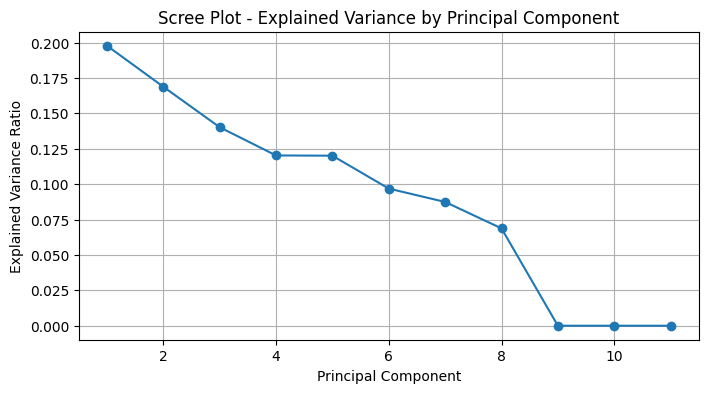

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Scree Plot - Explained Variance by Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


The Scree Plot illustrates the explained variance ratio of each principal component. From the plot, we observe that:

- The first few components (PC1–PC5) retain the majority of the variance.

    + PC1 alone explains approximately 20% of the variance.

    + The cumulative variance of the first 5 components is substantial (over 75%).

- After PC5, the curve starts to flatten, indicating that additional components contribute less significantly to the overall information.

- The last few components (PC9–PC11) explain almost no variance, suggesting they carry redundant or noise-related information.

🎯 Conclusion:
Selecting the first 5–6 principal components would be an effective dimensionality reduction strategy, preserving most of the dataset's variability while reducing complexity.

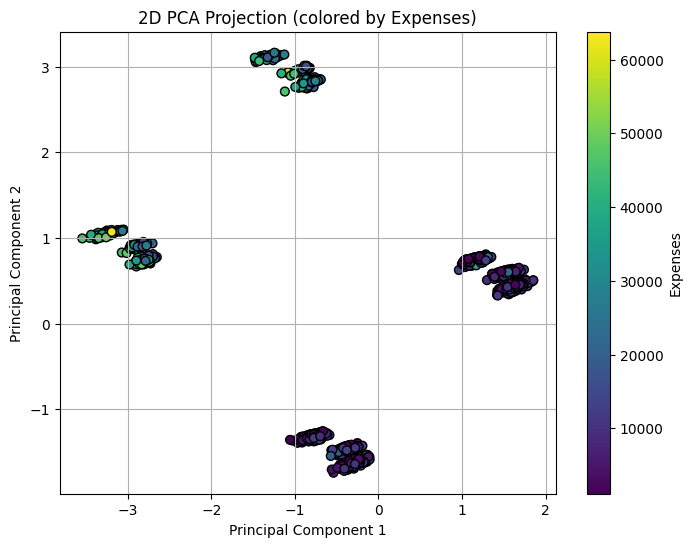

In [34]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection (colored by Expenses)")
plt.colorbar(scatter, label='Expenses')
plt.grid(True)
plt.show()


🔍 Analysis of the Data Distribution after PCA
The following scatter plot shows the distribution of the data in a two-dimensional space, formed by the first two principal components (PC1 and PC2). Each point represents an individual in the dataset and is colored according to their insurance cost (expenses).

🧩 Observations:
The data is separated into 5 to 6 clear clusters, indicating that PCA has successfully captured underlying structure in the original dataset.

These clusters are well-separated, showing that PCA effectively reduces dimensionality while preserving meaningful variation.

The color gradient reveals that individuals with high insurance costs (in yellow) tend to concentrate in the left side of the plot (PC1 < 0), while those with lower costs (in purple) are grouped in other areas.

PC1 appears to carry more discriminative power than PC2, as the color changes more significantly along the PC1 axis.

✅ Conclusion:
PCA has effectively visualized the relationship between input features and insurance expenses. The emerging clusters in PCA space suggest that some features—such as smoker, bmi, or age—may have a strong influence on the expenses variable.

In [35]:
total_var_2PCs = explained_variance[:2].sum()
total_var_6PCs = explained_variance[:6].sum()

print(f"📌 Tổng phương sai giữ lại với 2 thành phần đầu: {total_var_2PCs:.4f}")
print(f"📌 Tổng phương sai giữ lại với 6 thành phần đầu: {total_var_6PCs:.4f}")


📌 Tổng phương sai giữ lại với 2 thành phần đầu: 0.3665
📌 Tổng phương sai giữ lại với 6 thành phần đầu: 0.8438


✅ Using only the first two principal components retains **36.65%** of the total variance, which may not be sufficient to fully represent the original data structure in 2D visualizations.

✅ However, using the first five components retains **74.70%** of the variance, indicating that most of the original information is preserved, allowing for effective dimensionality reduction in machine learning tasks.


In [46]:
# Lưu kết quả
variances = []
components_range = list(range(1, 9))
for n in components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    total_var = np.sum(pca.explained_variance_ratio_)
    variances.append(total_var)
    print(f"✅ Tổng phương sai giữ lại với {n} thành phần: {total_var:.4f}")

✅ Tổng phương sai giữ lại với 1 thành phần: 0.1977
✅ Tổng phương sai giữ lại với 2 thành phần: 0.3665
✅ Tổng phương sai giữ lại với 3 thành phần: 0.5067
✅ Tổng phương sai giữ lại với 4 thành phần: 0.6269
✅ Tổng phương sai giữ lại với 5 thành phần: 0.7470
✅ Tổng phương sai giữ lại với 6 thành phần: 0.8438
✅ Tổng phương sai giữ lại với 7 thành phần: 0.9313
✅ Tổng phương sai giữ lại với 8 thành phần: 1.0000


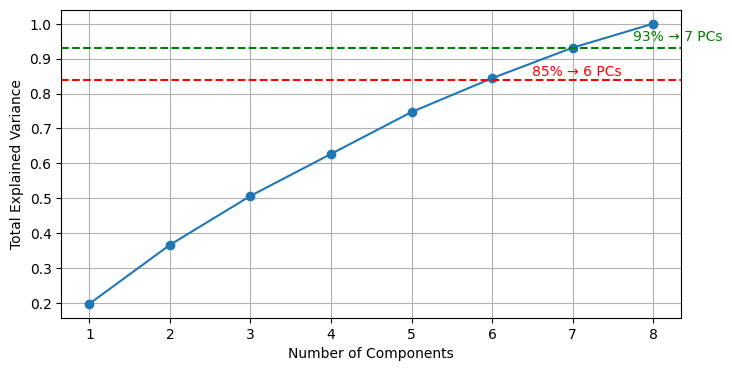

In [54]:
plt.figure(figsize=(8, 4))
plt.plot(components_range, variances, marker='o')
plt.xticks(components_range)
#
plt.axhline(y=0.84, color='red', linestyle='--', label='85% variance')
plt.axhline(y=0.93, color='green', linestyle='--', label='93% variance')

# Ghi chú trên đồ thị
plt.text(6.5, 0.85, '85% → 6 PCs', color='red')
plt.text(7.75, 0.95, '93% → 7 PCs', color='green')
#
plt.xlabel("Number of Components")
plt.ylabel("Total Explained Variance")
plt.grid(True)
plt.show()
